# election prediction

In [2]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
tf.compat.v1.disable_eager_execution()


RANDOMSEED = 40

input_data=pd.read_csv("C:/Users/97254/Downloads/county_factsNew.csv",encoding='latin-1')
input_data=input_data.iloc[50:180, :].sample(frac=1) # all rows, all the features and no labels

input_data.head()

,fips,area_name,state_abbreviation,AGE135214,AGE295214,AGE775214,SEX255214,RHI225214,RHI325214,RHI425214,...,POP815213,EDU635213,EDU685213,VET605213,LFE305213,state_abbreviation.1,party,candidate,votes,fraction_votes
165,5099.0,Nevada County,AR,6.4,22.7,19.4,50.6,30.5,0.5,0.4,...,2.7,82.1,12.8,762.0,25.1,AL,Republican,Donald Trump,1720,0.538
51,1099.0,Monroe County,AL,5.5,23.4,17.9,52.6,41.1,1.3,0.4,...,1.3,76.1,10.6,1237.0,23.3,AL,Democrat,Hillary Clinton,3019,0.801
52,1101.0,Montgomery County,AL,6.8,24.0,13.3,52.6,56.7,0.3,2.6,...,5.7,85.6,31.5,20008.0,19.3,AL,Democrat,Bernie Sanders,226,0.099
95,2270.0,Wade Hampton Census Area,AK,13.7,42.0,5.2,47.5,0.2,91.7,0.3,...,50.0,76.6,5.4,351.0,6.0,AL,Democrat,Hillary Clinton,1494,0.621
99,4000.0,Arizona,NaN,6.4,24.1,15.9,50.3,4.7,5.3,3.3,...,26.8,85.7,26.9,522382.0,24.6,AL,Democrat,Hillary Clinton,2438,0.909


# labelencoder

In [3]:
labelencoder=LabelEncoder()
for col in input_data.columns:
    input_data[col] = labelencoder.fit_transform(input_data[col].astype(str))

target = input_data.iloc[80:150, 22].sample(frac=1)# all ows, label only

# slice data

In [2]:
def load_iris_data():

    data=input_data.iloc[:200, 3:21] # all rows, all the features and no labels
    target = input_data.iloc[:200, 22]  # all rows, label only

    # Prepend the column of 1s for bias
    L, W  = data.shape
    all_X = np.ones((L, W + 1))
    all_X[:, 1:] = data
    num_labels = len(np.unique(target))
    all_y = np.eye(num_labels)[target]
    return train_test_split(all_X, all_y, test_size=0.33, random_state=RANDOMSEED)




def initialize_weights(shape, stddev):
    weights = tf.random.normal(shape, stddev=stddev)
    return tf.Variable(weights)

def forward_propagation(X, weights_1, weights_2):
    sigmoid = tf.nn.sigmoid(tf.matmul(X, weights_1))
    y = tf.matmul(sigmoid, weights_2)
    return y

def run(h_size, stddev, sgd_step):
    train_x, test_x, train_y, test_y = load_iris_data()

    # Size of Layers
    x_size = train_x.shape[1]  # Input nodes: 23 features and 1 bias
    y_size = train_y.shape[1]  # Outcomes (2 types of party)

    # variables
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])
    weights_1 = initialize_weights((x_size, h_size), stddev)
    weights_2 = initialize_weights((h_size, y_size), stddev)

    #compute forword
    y_pred = forward_propagation(X, weights_1, weights_2)
    #what get the largest outcome
    predict = tf.argmax(y_pred, dimension=1)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
    updates_sgd = tf.train.GradientDescentOptimizer(sgd_step).minimize(cost)
    sess = tf.Session()
    # init = tf.global_variables_initializer()
    init = tf.initialize_all_variables()
    steps = 50
    sess.run(init)
    x  = np.arange(steps)
    test_acc = []
    train_acc = []
    print("Step, train accuracy, test accuracy")
    for step in range(steps):
        # Train with each example
        for i in range(len(train_x)):
            sess.run(updates_sgd, feed_dict={X: train_x[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_x, y: train_y}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) ==
                                sess.run(predict, feed_dict={X: test_x, y: test_y}))

        print("%d, %.2f%%, %.2f%%"
              % (step + 1, 100. * train_accuracy, 100. * test_accuracy))
        #x.append(step)
        test_acc.append(100. * test_accuracy)
        train_acc.append(100. * train_accuracy)

    t = [np.array(test_acc)]
    t.append(train_acc)
    title = "Steps vs Accuracy-No of hidden nodes: " + str(h_size) + ", sgd step:" + str(sgd_step) +             ", std dev:" + str(stddev)
    label = ['Test Accuracy', 'Train Accuracy']
    sess.close()


def main():
    run(128,0.1,0.01)


if __name__ == '__main__':
    main()

Instructions for updating:
Use the `axis` argument instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step, train accuracy, test accuracy
1, 75.86%, 69.77%
2, 80.46%, 67.44%
3, 79.31%, 65.12%
4, 83.91%, 65.12%
5, 77.01%, 65.12%
6, 80.46%, 65.12%
7, 79.31%, 65.12%
8, 83.91%, 74.42%
9, 82.76%, 69.77%
10, 81.61%, 72.09%
11, 81.61%, 69.77%
12, 83.91%, 65.12%
13, 81.61%, 67.44%
14, 86.21%, 69.77%
15, 82.76%, 65.12%
16, 82.76%, 67.44%
17, 83.91%, 65.12%
18, 80.46%, 65.12%
19, 86.21%, 62.79%
20, 87.36%, 62.79%
21, 88.51%, 60.47%
22, 87.36%, 69.77%
23, 80.46%, 67.44%
24, 87.36%, 58.14%
25, 87.36%, 65.12%
26, 83.91%, 60.47%
27, 82.76%, 65.12%
28, 83.91%, 65.12%
29, 88.51%, 60.47%
30, 90.80%, 65.12%
31, 87.36%, 65.12%
32, 82.76%, 67.44%
33, 85.06%, 69.77%
34, 86.21%, 67.44%
35,

In [3]:
def load_iris_data():

    data=input_data.iloc[:200, 3:21] # all rows, all the features and no labels
    target = input_data.iloc[:200, 22]  # all rows, label only

    # Prepend the column of 1s for bias
    L, W  = data.shape
    all_X = np.ones((L, W + 1))
    all_X[:, 1:] = data
    num_labels = len(np.unique(target))
    all_y = np.eye(num_labels)[target]
    return train_test_split(all_X, all_y, test_size=0.33, random_state=RANDOMSEED)




def initialize_weights(shape, stddev):
    weights = tf.random.normal(shape, stddev=stddev)
    return tf.Variable(weights)

def forward_propagation(X, weights_1, weights_2):
    sigmoid = tf.nn.sigmoid(tf.matmul(X, weights_1))
    y = tf.matmul(sigmoid, weights_2)
    return y

def run(h_size, stddev, sgd_step):
    train_x, test_x, train_y, test_y = load_iris_data()

    # Size of Layers
    x_size = train_x.shape[1]  # Input nodes: 23 features and 1 bias
    y_size = train_y.shape[1]  # Outcomes (2 types of party)

    # variables
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])
    weights_1 = initialize_weights((x_size, h_size), stddev)
    weights_2 = initialize_weights((h_size, y_size), stddev)

    #compute forword
    y_pred = forward_propagation(X, weights_1, weights_2)
    #what get the largest outcome
    predict = tf.argmax(y_pred, dimension=1)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
    updates_sgd = tf.train.GradientDescentOptimizer(sgd_step).minimize(cost)
    sess = tf.Session()
    # init = tf.global_variables_initializer()
    init = tf.initialize_all_variables()
    steps = 50
    sess.run(init)
    x  = np.arange(steps)
    test_acc = []
    train_acc = []
    print("Step, train accuracy, test accuracy")
    for step in range(steps):
        # Train with each example
        for i in range(len(train_x)):
            sess.run(updates_sgd, feed_dict={X: train_x[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_x, y: train_y}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) ==
                                sess.run(predict, feed_dict={X: test_x, y: test_y}))

        print("%d, %.2f%%, %.2f%%"
              % (step + 1, 100. * train_accuracy, 100. * test_accuracy))
        #x.append(step)
        test_acc.append(100. * test_accuracy)
        train_acc.append(100. * train_accuracy)

    t = [np.array(test_acc)]
    t.append(train_acc)
    title = "Steps vs Accuracy-No of hidden nodes: " + str(h_size) + ", sgd step:" + str(sgd_step) +             ", std dev:" + str(stddev)
    label = ['Test Accuracy', 'Train Accuracy']
    sess.close()


def main():
    run(128,0.1,0.001)


if __name__ == '__main__':
    main()

Step, train accuracy, test accuracy
1, 70.11%, 55.81%
2, 71.26%, 53.49%
3, 73.56%, 60.47%
4, 77.01%, 62.79%
5, 75.86%, 62.79%
6, 77.01%, 65.12%
7, 81.61%, 65.12%
8, 83.91%, 65.12%
9, 82.76%, 65.12%
10, 86.21%, 65.12%
11, 88.51%, 65.12%
12, 90.80%, 67.44%
13, 91.95%, 67.44%
14, 91.95%, 69.77%
15, 91.95%, 67.44%
16, 93.10%, 67.44%
17, 93.10%, 67.44%
18, 93.10%, 67.44%
19, 93.10%, 67.44%
20, 93.10%, 67.44%
21, 94.25%, 67.44%
22, 94.25%, 67.44%
23, 94.25%, 67.44%
24, 95.40%, 67.44%
25, 96.55%, 65.12%
26, 96.55%, 65.12%
27, 97.70%, 67.44%
28, 97.70%, 67.44%
29, 97.70%, 67.44%
30, 97.70%, 67.44%
31, 97.70%, 67.44%
32, 97.70%, 67.44%
33, 97.70%, 67.44%
34, 97.70%, 67.44%
35, 97.70%, 69.77%
36, 97.70%, 69.77%
37, 97.70%, 69.77%
38, 97.70%, 69.77%
39, 97.70%, 69.77%
40, 97.70%, 69.77%
41, 97.70%, 69.77%
42, 97.70%, 69.77%
43, 97.70%, 69.77%
44, 97.70%, 69.77%
45, 97.70%, 69.77%
46, 97.70%, 69.77%
47, 97.70%, 69.77%
48, 97.70%, 69.77%
49, 97.70%, 69.77%
50, 97.70%, 69.77%


Step, train accuracy, test accuracy
1, 72.41%, 67.44%
2, 75.86%, 69.77%
3, 78.16%, 72.09%
4, 79.31%, 74.42%
5, 80.46%, 74.42%


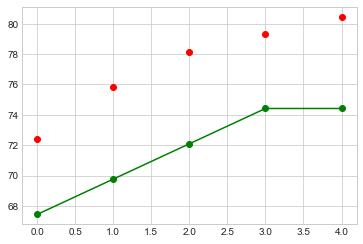

In [18]:
def load_iris_data():

    data=input_data.iloc[:200, 3:21] # all rows, all the features and no labels
    target = input_data.iloc[:200, 22]  # all rows, label only

    # Prepend the column of 1s for bias
    L, W  = data.shape
    all_X = np.ones((L, W + 1))
    all_X[:, 1:] = data
    num_labels = len(np.unique(target))
    all_y = np.eye(num_labels)[target]
    return train_test_split(all_X, all_y, test_size=0.33, random_state=RANDOMSEED)




def initialize_weights(shape, stddev):
    weights = tf.random.normal(shape, stddev=stddev)
    return tf.Variable(weights)

def forward_propagation(X, weights_1, weights_2):
    sigmoid = tf.nn.sigmoid(tf.matmul(X, weights_1))
    y = tf.matmul(sigmoid, weights_2)
    return y

def run(h_size, stddev, sgd_step):
    train_x, test_x, train_y, test_y = load_iris_data()

    # Size of Layers
    x_size = train_x.shape[1]  # Input nodes: 23 features and 1 bias
    y_size = train_y.shape[1]  # Outcomes (2 types of party)

    # variables
    X = tf.placeholder("float", shape=[None, x_size])
    y = tf.placeholder("float", shape=[None, y_size])
    weights_1 = initialize_weights((x_size, h_size), stddev)
    weights_2 = initialize_weights((h_size, y_size), stddev)

    #compute forword
    y_pred = forward_propagation(X, weights_1, weights_2)
    #what get the largest outcome
    predict = tf.argmax(y_pred, dimension=1)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))
    updates_sgd = tf.train.GradientDescentOptimizer(sgd_step).minimize(cost)
    sess = tf.Session()
    # init = tf.global_variables_initializer()
    init = tf.initialize_all_variables()
    steps = 5
    sess.run(init)
    x  = np.arange(steps)
    test_acc = []
    train_acc = []
    print("Step, train accuracy, test accuracy")
    for step in range(steps):
        # Train with each example
        for i in range(len(train_x)):
            sess.run(updates_sgd, feed_dict={X: train_x[i: i + 1], y: train_y[i: i + 1]})

        train_accuracy = np.mean(np.argmax(train_y, axis=1) ==
                                 sess.run(predict, feed_dict={X: train_x, y: train_y}))
        test_accuracy = np.mean(np.argmax(test_y, axis=1) ==
                                sess.run(predict, feed_dict={X: test_x, y: test_y}))
        
        print("%d, %.2f%%, %.2f%%"
              % (step + 1, 100. * train_accuracy, 100. * test_accuracy))
        #x.append(step)
        test_acc.append(100. * test_accuracy)
        train_acc.append(100. * train_accuracy)

    t = [np.array(test_acc)]
    t.append(train_acc)
    title = "Steps vs Accuracy-No of hidden nodes: " + str(h_size) + ", sgd step:" + str(sgd_step) +             ", std dev:" + str(stddev)
    label = ['Test Accuracy', 'Train Accuracy']
    sess.close()
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, train_acc, '-ok', color='red');

    plt.style.use('seaborn-whitegrid')
    
    plt.plot(x, test_acc, '-ok', color='green');
    plt.xlabel("step")
    plt.ylabel("Accuracy");

def main():
    run(140,0.1,0.001)


if __name__ == '__main__':
    main()

red line=train accuracy
green line=test accuracy
